<a href="https://colab.research.google.com/github/adhishagc/Genetic-Algorithm-using-Python-Example/blob/master/Genetic_Algorithm_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Table of Contents**

---


1.   **Importing Libraries**
2.   **Access to Google Drive**
3.**Function Definitions**
4. **Running the Model**





### **Initialization**


1.   Import of Libraries
2.   Access to Google Drive
3. Load the Dataset
4. View the Dataset as a Dataframe



In [0]:
#importing libraries
import pandas as pd
import numpy as np
import random as random
from matplotlib import pyplot as plt
import time

In [107]:
#Access to google drive. The Video Store dataset was uploaded to google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#The dataset is load dataset to a dataframe
df = pd.read_csv('/content/gdrive/My Drive/Genetic Algorithms/Assignment 01/dataset.csv')

In [109]:
#view dataset
df

,file,size,duration
0,1,800,121
1,2,700,95
2,3,650,85
3,4,750,100
4,5,600,78
5,6,900,125
6,7,950,130
7,8,875,128
8,9,1050,135
9,10,1500,120


### **Population Creation Function**
A dataframe which consists of the entire population is returned when this function is called. The structure would be of 1 column to label the chromosome number and the remaining 10 columns will represent the file number of the dataset. The returned dataframe (population) will consist of random 0 or 1 values in the  chromosome.

In [0]:
# function for init population
def createInitPop(popSize):
  #array of data to represent the chromosomes and random file labellings
  values ={
    'chromosome':[i for i in range(1,popSize+1)],
    'file 1':[random.randint(0, 1) for _ in range(popSize)],
    'file 2':[random.randint(0, 1) for _ in range(popSize)],
    'file 3':[random.randint(0, 1) for _ in range(popSize)],
    'file 4':[random.randint(0, 1) for _ in range(popSize)],
    'file 5':[random.randint(0, 1) for _ in range(popSize)],
    'file 6':[random.randint(0, 1) for _ in range(popSize)],
    'file 7':[random.randint(0, 1) for _ in range(popSize)],
    'file 8':[random.randint(0, 1) for _ in range(popSize)],
    'file 9':[random.randint(0, 1) for _ in range(popSize)],
    'file 10':[random.randint(0, 1) for _ in range(popSize)],
  }
  #convert the array of population to a dataframe
  values = pd.DataFrame(values)
  
  #return the dataframe
  return values

### **Evaluate Fitness Function**

\begin{equation}
f(x_i) = \textrm{Playing time of video file of } x_i
\end{equation}

\begin{equation}
g(x_i) = \textrm{File size of video file of } x_i
\end{equation}

**Objective Function**
\begin{equation}
\textrm{Maximize }\sum f(x_i) \textrm{ such that } \sum g(x_i)<=4500
\end{equation}

In [0]:
#Evaluate Fitness Function
def EvaluateFitness(chromosome,df,popSize):
  #fitness array
  fitness = {
      'chromosome':[x for x in range(1,popSize+1)],
      'fitness':[0 for x in range(0,popSize)]
  }
  
  #size array
  filesize = {
      'chromosome':[x for x in range(1,popSize+1)],
      'size':[0 for x in range(0,popSize)]
  }

  #convert to dataframe
  fitness = pd.DataFrame(fitness)
  filesize = pd.DataFrame(filesize)

  #total file size and duration PER Solution
  size=0
  duration=0
  
  #implementation of the Fitness Function
  # i navigates the rows while the j navigates the file1, file2 ... columns in the chromosome.
  for i in range(popSize):
    for j in range(1,11):
      #navigate through each chromosome in the population and check for the cells which contains a file, that is 1 value in the cell.
      
      if(chromosome.iloc[i,j] ==1):
        #if it contains any file in the cell(that is a 1 value) the size and the duration of the solution is calculated by comparing the dataset.
        size += df.iloc[j-1,1]
        duration +=df.iloc[j-1,2]
    
    #calculation of the fitness and the total file size of the entire population
    if(size<=4500):
      #these values are potential solutions since the size is less than 4500.
      #respective fitness and filesizes are added to the dataframe
      fitness.loc[i,'fitness'] = duration
      filesize.loc[i,'size'] = size
      
    else:
      #These will be non solutions. Therefore the fitness is reduced by multiplying by 0.5
      #The file size is stored
      fitness.loc[i,'fitness'] = duration*0.5
      filesize.loc[i,'size'] = size
      
    #The PER solution size and duration values are reset
    size = 0
    duration = 0
  
  #The entire fitness and filesize of the population is returned as a DataFrame
  return fitness, filesize      

### **Rank Selection Function**

In [0]:
#Rank Selection Function
def rankSelection(chromosome,fitness,popSize):
  #Total integer value from 0 to population size 
  rankTotal = sum(x for x in range(0,popSize))
  
  #A random value inbetween 0 and above value
  totRandom = random.uniform(0,1)*rankTotal
  
  #variable to store the accumilation of fitness values
  tot=0
  #sorting the fitness dataframe having the lowest on the top and the highest in the bottom
  fitness_sorted = fitness.sort_values(by=['fitness'])
  
  for i in fitness_sorted.index:
    #accumilation of the fitness values till the accumilation is equal to the random total generated
    tot += fitness_sorted.loc[i,'fitness']
    if(tot>=totRandom):
      global fifo_index
      fifo_index = i
      
      #returning the chromosome(as a parent selected) and the respective value i where the accumilation stopped. 
      selected_parent = chromosome.loc[i,:]
      selected_parent_id = i
      
      return selected_parent,selected_parent_id

### **Binary Represented N Point Crossover Function Generalized**
The function has generalized the Single Point Crossover and the N-Point Crossover operators.
When :
\begin{equation}
n = 1...n \textrm{ which is the n-point}
\end{equation}
is passed as a parameter it the function it acts as a single point crossover and for the rest as an n point crossover. Also the :
\begin{equation}
p_c = 0.8 \textrm{ or etc, crossover rate}
\end{equation}
would be the crossover rate for the function.


In [0]:
def binary_rep_n_point_crossover(n,parent1,parent2,pc):
  
  parent1_parts = [] #this list contains parent 1 partwise split sections based on the random values generated
  parent2_parts = [] #this list contains parent 2 partwise split sections based on the random values generated
  random_vals = [] #list to store the generated random values
  start_pos = 0 #start position of the spiliting parents
  random_position = start_pos+1 #initial random position
  L_1 = 10-1 # the random value range should be in between 1 to 10-1 which is L-1

  parent1_array = parent1.values
  parent2_array = parent2.values

  if(random.uniform(0,1)>=pc):
    #crossover takes place
    count = 1

    for n_times in range(n+1):
      #random position is generated here. This random position will be the place
      #where the chromosome will be split
      random_position = random.randint(random_position,L_1)

      #The generated random values are stored in this list
      random_vals.append(random_position)


      if(n_times == n):
        parent1_parts.append(parent1_array[start_pos:L_1+1])
        parent2_parts.append(parent2_array[start_pos:L_1+1])

      else:

        parent1_parts.append(parent1_array[start_pos:random_position])
        parent2_parts.append(parent2_array[start_pos:random_position])

      start_pos = random_position
      #random_position +=1


    for i in range(len(parent1_parts)):
      if(count%2==0):
        temp = parent1_parts[i]
        parent1_parts[i] = parent2_parts[i]
        parent2_parts[i] = temp
        count +=1
      else:
        #nothing
        count += 1


    offspring1_array = np.concatenate(([parent1_parts[i] for i in range(len(parent1_parts))]))
    offspring2_array = np.concatenate(([parent2_parts[i] for i in range(len(parent1_parts))]))
    return offspring1_array,offspring2_array
  
  else:
    return parent1_array,parent2_array 
  


### **BitFlip of the Mutation**
Bit flip is done based on a randomly generated array of numbers compared with the mutation rate variable. If the compared value is higher than the mutation rate bit value is flipped.
\begin{equation}
p_m = 0 .... 1  \textrm{ Mutation rate Variable}
\end{equation}

In [0]:
def bitflip(chromosome,pm):
  #generate random bit array
  bits = [random.uniform(0,1) for _ in range(10)] #range size is the number of files
  
  for i in range(10):
    if(bits[i]>=pm):
      if(chromosome[i] == 0):
        chromosome[i] = 1
      else:
        chromosome[i] = 0
  
  return chromosome
      

### **Supportive Functions**
These functions are used for retrieving individual chromosome information. Much used for debugging purposes.

1.   **getFitness** function retruns the fitness and the total size of the Chromosome
2.   **getDetails** function returns the total file size and the total duration of the Chromosome



In [0]:
def getFitness(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
  
  if(total_size>4500):
    fitness = total_duration*0.5
    return fitness,total_size
  else:
    fitness = total_duration
    
    return fitness,total_size

In [0]:
def getDetails(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
      
  return total_duration, total_size

### **Replace the Offspring with the Population**
Offspring is replaced based on age. That is the selected parents are replaced.



In [0]:
def replace_with_offspring(parent1_id,parent2_id,offspring1,offspring2):
  #Offspring is replaced based on age. That is the selected parents are replaced.
  chromosome.iloc[parent1_id,1:] = offspring1
  chromosome.iloc[parent2_id,1:] = offspring2

### **Iterate the Model**



In [0]:
def trainModel(n,n_point,p_c,p_m):
  #variable to count and display the current epoch
  epoch = 0
  fit = pd.DataFrame()
  filesize = pd.DataFrame()
  parent1 = pd.DataFrame()
  parent2 = pd.DataFrame()
  
  
  for i in range(n):
    #Fitness Evaluation
    fitness, totFileSize = EvaluateFitness(chromosome,df,popSize)
    
    #parent selection
    parent1, parent1_id = rankSelection(chromosome,fitness,popSize)
    parent2, parent2_id = rankSelection(chromosome,fitness,popSize)
    
    #offspring generation through crossover
    offspring1,offspring2 = binary_rep_n_point_crossover(n_point,parent1[1:],parent2[1:],p_c)
    
    #passing the generated offspring for mutation
    offspring1 = bitflip(offspring1,p_m)
    offspring2 = bitflip(offspring2,p_m)
    
    #replace parents
    replace_with_offspring(parent1_id,parent2_id,offspring1,offspring2)
    
    #display epoch
    #print(epoch)
    #epoch +=1
    
    #debugging purposes returning values
    fit = fitness
    filesize = totFileSize
    
    #return parent1,parent2,offspring1,offspring2
  #return fit,filesize,parent1,parent2     # general purpose
  #return 


In [171]:
print(10/2)

5.0


### **Run the Program**

In [183]:
#SCENE 01
#population size
popSize = 60 

#creation of population of Chromosomes
chromosome = createInitPop(popSize)

#fifo index relates to the index to be removed. -1 is the initial value
fifo_index = -1

#iteration and 
iterations = 100

#n point for crossover
n_point = 1
#crossover rate
p_c = 0.8
#mutation rate
p_m = 0.01

#Final population Duration and Size storage
finalFitness = []
finalSize = []


#train model
start = time.time()
#fit,filesize,parent1,parent2 = trainModel(iterations,n_point,p_c,p_m)
trainModel(iterations,n_point,p_c,p_m)
end = time.time()
print("Population Size :" + str(popSize))
print("Iterations :" + str(iterations))
print("Elapsed time :" + str(end - start) + " seconds")

#Get Fitness and Size information for the Last Population
for i in range(popSize):
  fitness,size = getFitness(chromosome.iloc[i,1:].values)
  finalFitness.append(fitness)
  finalSize.append(size)
  

Population Size :60
Iterations :100
Elapsed time :6.4302332401275635 seconds


In [0]:
#Getting the Optimum solution Information to Variables
Best_Solution_id = finalFitness.index(max(finalFitness))
Best_Solution_Size = finalSize[Best_Solution_id] 
Best_Solution_Duration = finalDuration[Best_Solution_id]
Best_Solution = chromosome.iloc[Best_Solution_id]

In [186]:
#Printing the Optimum Solution Information
print("Optimum Solution ID : " + str(Best_Solution_id))
print("Optimum Fitness : " + str(max(finalFitness)))
print("Optimum Solution File Size : " + str(Best_Solution_Size) + "MB")
print("Optimum Solution Duration : " + str(Best_Solution_Duration) + " Minutes")
print("Optimum Solution : ")
print(str(Best_Solution[1:]))

Optimum Solution ID : 45
Optimum Fitness : 611
Optimum Solution File Size : 4450MB
Optimum Solution Duration : 561 Minutes
Optimum Solution : 
file 1     1
file 2     0
file 3     0
file 4     1
file 5     0
file 6     1
file 7     1
file 8     0
file 9     1
file 10    0
Name: 45, dtype: int64


### **Plotting the Final Result**

This plot shows 3 import facts about the final solution. 


1.   The Horizontal Line shows the 4,500MB benchmark line
2.   The Zig Zag plot shows the Fitness of the Final Population
3. The Red Cross (+) shows the position of the Optimum solution Generated





Text(0.5, 1.0, 'Chromosome in the Evolved Population vs File Size')

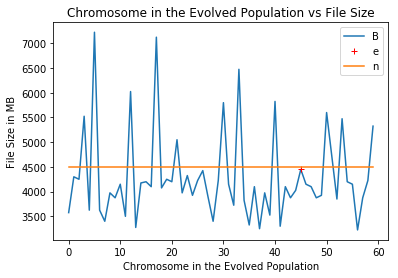

In [187]:
plt.plot([x for x in range(popSize)],[finalSize[x] for x in range(len(finalSize))])
plt.legend("Evolved Generation")
plt.plot([Best_Solution_id],[Best_Solution_Size],'r+')
plt.legend("Optimum Solution")
plt.plot([x for x in range(popSize)],[4500 for x in range(len(finalSize))])
plt.legend("Benchmark")
plt.xlabel("Chromosome in the Evolved Population")
plt.ylabel("File Size in MB")
plt.title("Chromosome in the Evolved Population vs File Size")


### **Variation with  Iteration Count**

In [0]:
def get_avg_best(n,pop_1):
  for j in range(0,n+1):
    trainModel(j,n_point,p_c,p_m)
    
    finalDuration = []
    finalSize = []
    for i in range(popSize):
      duration,size = getFitness(pop_1.iloc[i,1:].values)
      finalDuration.append(duration)
      finalSize.append(size)
      
    best_vals_size.append(finalSize[finalDuration.index(max(finalDuration))])
    best_vals_duration.append(max(finalDuration))
    print("Completed : " + str(j) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    pop_1 = chromosome

In [0]:
chromosome = createInitPop(popSize)

In [190]:

pop_1 = chromosome
#save the best chromosome fitness per iteration
best_vals_size = [ ]
best_vals_duration = [ ]
n=100
get_avg_best(n,pop_1)


Completed : 0 Best Size :4325 Best Duration : 604
Completed : 1 Best Size :4325 Best Duration : 604
Completed : 2 Best Size :4325 Best Duration : 604
Completed : 3 Best Size :4325 Best Duration : 604
Completed : 4 Best Size :4325 Best Duration : 604
Completed : 5 Best Size :4325 Best Duration : 604
Completed : 6 Best Size :4325 Best Duration : 604
Completed : 7 Best Size :4325 Best Duration : 604
Completed : 8 Best Size :4325 Best Duration : 604
Completed : 9 Best Size :4325 Best Duration : 604
Completed : 10 Best Size :4325 Best Duration : 604
Completed : 11 Best Size :4325 Best Duration : 604
Completed : 12 Best Size :4325 Best Duration : 604
Completed : 13 Best Size :4325 Best Duration : 604
Completed : 14 Best Size :4325 Best Duration : 604
Completed : 15 Best Size :4325 Best Duration : 604
Completed : 16 Best Size :4325 Best Duration : 604
Completed : 17 Best Size :4325 Best Duration : 604
Completed : 18 Best Size :4325 Best Duration : 604
Completed : 19 Best Size :4325 Best Durat

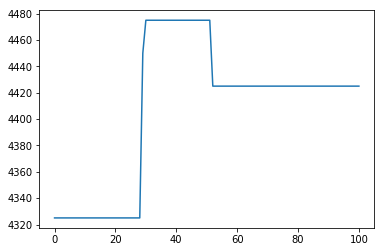

In [191]:
plt.plot([x for x in range(0,n+1)],best_vals_size)

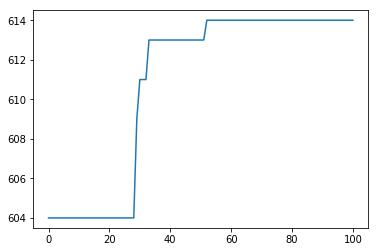

In [192]:
plt.plot([x for x in range(0,n+1)],best_vals_duration)


### **Variation with Crossover Rate**

In [0]:
def get_avg_best_pc_var(start,end,step,pop_1):
  epoch = 1
  for j in frange(start,end,step):
    trainModel(iteration_pc+1,n_point,j,p_m)
    
    finalDuration = []
    finalSize = []
    for i in range(popSize):
      duration,size = getFitness(pop_1.iloc[i,1:].values)
      finalDuration.append(duration)
      finalSize.append(size)
      
    best_vals_size.append(finalSize[finalDuration.index(max(finalDuration))])
    best_vals_duration.append(max(finalDuration))
    print("Completed : " + str(epoch) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    pop_1 = chromosome
    epoch +=1

In [0]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

In [0]:
pop_1 = chromosome

In [132]:
best_vals_size = [ ]
best_vals_duration = [ ]
iteration_pc = 10
start =0.8
end = 1
step = 0.01
get_avg_best_pc_var(start,end,step,pop_1)

Completed : 1 Best Size :4425 Best Duration : 614
Completed : 2 Best Size :4425 Best Duration : 614
Completed : 3 Best Size :4425 Best Duration : 614
Completed : 4 Best Size :4425 Best Duration : 614
Completed : 5 Best Size :4425 Best Duration : 614
Completed : 6 Best Size :4425 Best Duration : 614
Completed : 7 Best Size :4425 Best Duration : 614
Completed : 8 Best Size :4425 Best Duration : 614
Completed : 9 Best Size :4425 Best Duration : 614
Completed : 10 Best Size :4425 Best Duration : 614
Completed : 11 Best Size :4425 Best Duration : 614
Completed : 12 Best Size :4425 Best Duration : 614
Completed : 13 Best Size :4425 Best Duration : 614
Completed : 14 Best Size :4425 Best Duration : 614
Completed : 15 Best Size :4425 Best Duration : 614
Completed : 16 Best Size :4425 Best Duration : 614
Completed : 17 Best Size :4425 Best Duration : 614
Completed : 18 Best Size :4425 Best Duration : 614
Completed : 19 Best Size :4425 Best Duration : 614
Completed : 20 Best Size :4425 Best Dura

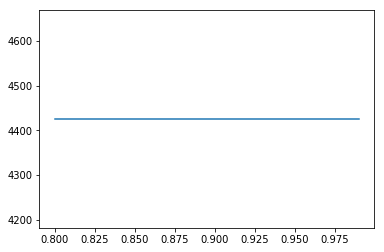

In [133]:
plt.plot([x for x in frange(start,end,step)],best_vals_size)

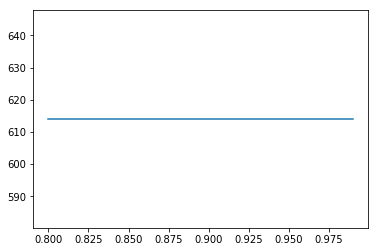

In [134]:
plt.plot([x for x in frange(start,end,step)],best_vals_duration)

### **Variation with Mutation Rate**

In [0]:
def get_avg_best_pm_var(start,end,step,pop_1):
  epoch = 1
  for j in frange(start,end,step):
    trainModel(iteration_pm+1,n_point,p_c,j)
    
    finalDuration = []
    finalSize = []
    for i in range(popSize):
      duration,size = getFitness(pop_1.iloc[i,1:].values)
      finalDuration.append(duration)
      finalSize.append(size)
      
    best_vals_size.append(finalSize[finalDuration.index(max(finalDuration))])
    best_vals_duration.append(max(finalDuration))
    print("Completed : " + str(epoch) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    pop_1 = chromosome
    epoch +=1

In [0]:
chromosome = createInitPop(popSize)
pop_1 = chromosome

In [137]:
best_vals_size = [ ]
best_vals_duration = [ ]
iteration_pm = 10
start =0
end = 1
step = 0.01
get_avg_best_pm_var(start,end,step,pop_1)

Completed : 1 Best Size :4200 Best Duration : 571
Completed : 2 Best Size :4200 Best Duration : 571
Completed : 3 Best Size :4200 Best Duration : 571
Completed : 4 Best Size :4200 Best Duration : 571
Completed : 5 Best Size :4325 Best Duration : 604
Completed : 6 Best Size :4325 Best Duration : 604
Completed : 7 Best Size :4325 Best Duration : 604
Completed : 8 Best Size :4325 Best Duration : 604
Completed : 9 Best Size :4325 Best Duration : 604
Completed : 10 Best Size :4325 Best Duration : 604
Completed : 11 Best Size :4325 Best Duration : 604
Completed : 12 Best Size :4325 Best Duration : 604
Completed : 13 Best Size :4325 Best Duration : 604
Completed : 14 Best Size :4450 Best Duration : 611
Completed : 15 Best Size :4450 Best Duration : 611
Completed : 16 Best Size :4475 Best Duration : 613
Completed : 17 Best Size :4475 Best Duration : 613
Completed : 18 Best Size :4475 Best Duration : 613
Completed : 19 Best Size :4475 Best Duration : 613
Completed : 20 Best Size :4475 Best Dura

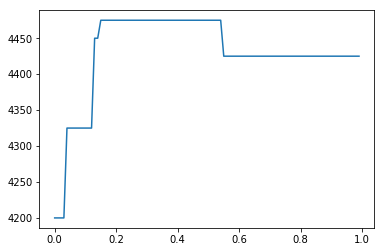

In [138]:
plt.plot([x for x in frange(start,end,step)],best_vals_size)

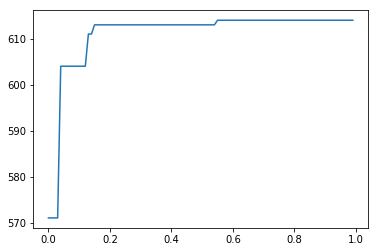

In [139]:
plt.plot([x for x in frange(start,end,step)],best_vals_duration)

### **Variation with Population size**

In [0]:
def pop_var(popSize):
  epoch = 1
  for j in range(1,popSize+1):
    chromosome = createInitPop(j)
    #n point for crossover
    n_point = 1
    #crossover rate
    p_c = 0.8
    #mutation rate
    p_m = 0.01

    finalDuration = []
    finalSize = []

    trainModel(10,n_point,p_c,p_m)
    
    #Get Fitness and Size information for the Last Population
    for i in range(j):
      duration,size = getDetails(chromosome.iloc[i,1:].values)
      finalDuration.append(duration)
      finalSize.append(size)
      
    best_vals_size.append(finalSize[finalDuration.index(max(finalDuration))])
    best_vals_duration.append(max(finalDuration))  
    
    print("Completed : " + str(epoch) + " Pop Size : " + str(j) + " Best Size :" + str(finalSize[finalDuration.index(max(finalDuration))]) + " Best Duration : " + str(max(finalDuration)))
    epoch += 1
    
    

In [147]:
#Final population Duration and Size storage
best_vals_size = [ ]
best_vals_duration = [ ]

popSize = 50
pop_var(popSize)

Completed : 1 Pop Size : 1 Best Size :2150 Best Duration : 299
Completed : 2 Pop Size : 2 Best Size :6775 Best Duration : 854
Completed : 3 Pop Size : 3 Best Size :4175 Best Duration : 568
Completed : 4 Pop Size : 4 Best Size :5575 Best Duration : 683
Completed : 5 Pop Size : 5 Best Size :7025 Best Duration : 866
Completed : 6 Pop Size : 6 Best Size :6525 Best Duration : 897
Completed : 7 Pop Size : 7 Best Size :5475 Best Duration : 667
Completed : 8 Pop Size : 8 Best Size :4725 Best Duration : 563
Completed : 9 Pop Size : 9 Best Size :7225 Best Duration : 909
Completed : 10 Pop Size : 10 Best Size :5675 Best Duration : 686
Completed : 11 Pop Size : 11 Best Size :7900 Best Duration : 989
Completed : 12 Pop Size : 12 Best Size :7175 Best Duration : 902
Completed : 13 Pop Size : 13 Best Size :6675 Best Duration : 837
Completed : 14 Pop Size : 14 Best Size :6375 Best Duration : 872
Completed : 15 Pop Size : 15 Best Size :6575 Best Duration : 824
Completed : 16 Pop Size : 16 Best Size :807

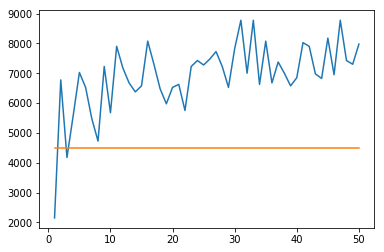

In [148]:
plt.plot([x for x in range(1,popSize+1)],best_vals_size)
plt.plot([x for x in range(1,popSize+1)],[4500 for i in range(1,popSize+1)])

In [149]:
best_vals_size[len(best_vals_size)-1]

7975

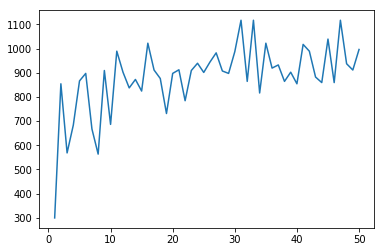

In [150]:
plt.plot([x for x in range(1,popSize+1)],best_vals_duration)

### **Brute Force**

In [196]:
for i in range(1,2**3+1):
  
  if(i%4 == 0):
    print("1")
  else:
    print("0")
  
  
  

0
0
0
1
0
0
0
1


In [203]:
index = 0
for i in range(4):
  for j in range(2**index):
    print("0")
  
  for j in range(2**index):
    print("1")
   
    

0
1
0
1
0
1
0
1


In [204]:
index = 1
for i in range(2):
  for j in range(2**index):
    print("0")
  
  for j in range(2**index):
    print("1")

0
0
1
1
0
0
1
1


In [0]:
def generate(variables,power):
  val = int((2**variables)/(2**(power+1)))
  file_10 = []
  for i in range(val):
    for j in range(2**power):
      file_10.append(0)

    for j in range(2**power):
      file_10.append(1)
      
  return file_10
  

In [0]:
variables = 10
#power = 2

rows = 2**variable
val = int((2**variable)/(2**(power+1)))

list_ret = []
for power in range(variables):
  list_ret.append(generate(variables,power))

In [0]:
#list_ret[0]

In [0]:
values ={
    
    'file ' + str(x+1):list_ret[x] for x in range(variables-1,-1,-1)
    
    
    
  }
  #convert the array of population to a dataframe
values = pd.DataFrame(values)

In [334]:
values

,file 10,file 9,file 8,file 7,file 6,file 5,file 4,file 3,file 2,file 1
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,1
8,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,1,0,0,1


In [0]:
def details(row):
  duration = 0
  size = 0
  fitness = 0
  for i in range(len(row)):
    if(row[i] == 1):
      size += df.loc[9-i,'size']
      duration += df.loc[9-i,'duration']
    
    if(size<=4500):
      fitness += duration
    else:
      fitness += duration*0.5
  
  return duration,size,fitness

In [0]:
final_duration = []
final_fitness = []
final_size = []
for i in range(1024):
  
  duration,size,fitness = details(values.iloc[i].values)
  final_duration.append(duration)
  final_size.append(size)
  final_fitness.append(fitness) 

In [0]:
nearst = 0
index = -1
for i in range(1024):
  if(final_size[i] > nearst and final_size[i] <=4500):
    nearst = final_size[i]
    index = i

In [427]:
final_size[index]

4500

In [428]:
final_duration[index]

525

In [429]:
index

558

In [430]:
final_fitness[index]

2795

In [431]:
values.iloc[index]

file 10    1
file 9     0
file 8     0
file 7     0
file 6     1
file 5     0
file 4     1
file 3     1
file 2     1
file 1     0
Name: 558, dtype: int64

### **Differential Evolution**

In [0]:
def mutate():
  #Get 4 distinct values
  state = True
  a = 0
  b = 0
  c = 0
  target_id = 0
  scaleFactor = 0.5
  while(state):
    a = np.random.randint(0,popSize)
    b = np.random.randint(0,popSize)
    c = np.random.randint(0,popSize)
    target_id = np.random.randint(0,popSize)
    state = checkDistinct(a,b,c,target_id)
    #print("a:" +str(a) +" b :"+str(b) +" c:" + str(c) +" target id:" +str(target_id) )
  #Get the respective solution items as arrays
  a_item = population.iloc[a,1:].values
  b_item = population.iloc[b,1:].values
  c_item = population.iloc[c,1:].values
  target_item = population.iloc[target_id,1:].values
  #Add the weighted difference
  for i in range(2):
    a_item[i] = a_item[i] + scaleFactor*(b_item[i]-c_item[i])
    
  return a_item, target_item,target_id

In [0]:
def crossover(donor,target):
  #crossover rate
  CR = 0.1
  
  #size of the arrays
  size = len(donor)
  
  #trial vector
  trial_vector = np.empty([size])
  
  #create an array with random values
  random_array = [random.uniform(0,1) for x in range(size)]
  for i in range(size):
    if(random_array[i] <=CR or i == random.randint(1,size)):
      #replace with donor
      trial_vector[i] = donor[i]
    else:
      #replace with target
      trial_vector[i] = target[i]
  
  return trial_vector

In [0]:
def checkDistinct(a,b,c,d):
  if(a != b != c !=d != a != c and b != d ):
    return False
  else:
    return True

In [0]:
def selection(trial_vector,target):
  fitness_trial,size_trial = getFitness(trial_vector)
  fitness_target,size_target = getFitness(trial_vector)
  
  
  if(fitness_trial>fitness_target):
    target = trial_vector
  else : 
    target = target
  
  return target

In [0]:
def replace_to_population(offspring,target_id):
  population.iloc[target_id,1:] = offspring

In [0]:
def iterate(n):
  #value = ackley_function(solution[0],solution[1])
  for i in range(n):
    donor, target,target_id = mutate()
    trial_vector = crossover(donor,target)
    offspring = selection(trial_vector,target)
    replace_to_population(offspring,target_id)

In [0]:
popSize = 100
population = createInitPop(popSize)

In [0]:
iterate(1000)

In [0]:
finalFitness = []
finalSize = []
#Get Fitness and Size information for the Last Population
for i in range(popSize):
  fitness,size = getFitness(population.iloc[i,1:].values)
  finalFitness.append(fitness)
  finalSize.append(size)

In [499]:
max(finalFitness)

573

In [0]:
#Getting the Optimum solution Information to Variables
Best_Solution_id = finalFitness.index(max(finalFitness))
Best_Solution_Size = finalSize[Best_Solution_id] 
Best_Solution_Duration = finalDuration[Best_Solution_id]
Best_Solution = chromosome.iloc[Best_Solution_id]


In [501]:
#Printing the Optimum Solution Information
print("Optimum Solution ID : " + str(Best_Solution_id))
print("Optimum Fitness : " + str(finalFitness[Best_Solution_id]))
print("Optimum Solution File Size : " + str(Best_Solution_Size) + "MB")
print("Optimum Solution Duration : " + str(Best_Solution_Duration) + " Minutes")
print("Optimum Solution : ")
print(str(Best_Solution[1:]))

Optimum Solution ID : 4
Optimum Fitness : 573
Optimum Solution File Size : 4225MB
Optimum Solution Duration : 444 Minutes
Optimum Solution : 
file 1     1
file 2     0
file 3     1
file 4     1
file 5     0
file 6     0
file 7     0
file 8     0
file 9     0
file 10    1
Name: 4, dtype: int64
